In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from pandas import datetime

<ipython-input-1-7faee6df6c29>:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
type(dateparse)

function

In [3]:
time_1 = pd.read_csv("case_time_series.csv",
                   parse_dates=['Date_YMD'], index_col='Date_YMD',
                   date_parser=dateparse)
time_1.head()

<ipython-input-2-978fa4e7b097>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')


,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
Date_YMD,,,,,,,
2020-01-30,30 January 2020,1,1,0,0,0,0
2020-01-31,31 January 2020,0,1,0,0,0,0
2020-02-01,1 February 2020,0,1,0,0,0,0
2020-02-02,2 February 2020,1,2,0,0,0,0
2020-02-03,3 February 2020,1,3,0,0,0,0


In [4]:
time_1.loc['2020-03-01']

Date               1 March 2020
Daily Confirmed               0
Total Confirmed               3
Daily Recovered               0
Total Recovered               3
Daily Deceased                0
Total Deceased                0
Name: 2020-03-01 00:00:00, dtype: object

In [5]:
time_1.iloc[92]

Date               1 May 2020
Daily Confirmed          2396
Total Confirmed         37262
Daily Recovered           962
Total Recovered         10021
Daily Deceased             77
Total Deceased           1231
Name: 2020-05-01 00:00:00, dtype: object

In [6]:
time=time_1.iloc[92:,:]

In [7]:
time.shape

(356, 7)

In [8]:
time.iloc[304]

Date               1 March 2021
Daily Confirmed           12270
Total Confirmed        11124248
Daily Recovered           12472
Total Recovered        10796873
Daily Deceased               92
Total Deceased           156695
Name: 2021-03-01 00:00:00, dtype: object

In [9]:
daily_recovered_df=time['Total Recovered']

In [10]:
daily_recovered_df.shape

(356,)

In [11]:
daily_recovered_df[335]

11522718

In [12]:
daily_recovered_df.describe()

count    3.560000e+02
mean     6.081703e+06
std      4.429941e+06
min      1.002100e+04
25%      1.013338e+06
50%      7.166982e+06
75%      1.030390e+07
max      1.344926e+07
Name: Total Recovered, dtype: float64

In [13]:
daily_recovered_df.head()

Date_YMD
2020-05-01    10021
2020-05-02    10852
2020-05-03    11763
2020-05-04    12845
2020-05-05    14140
Name: Total Recovered, dtype: int64

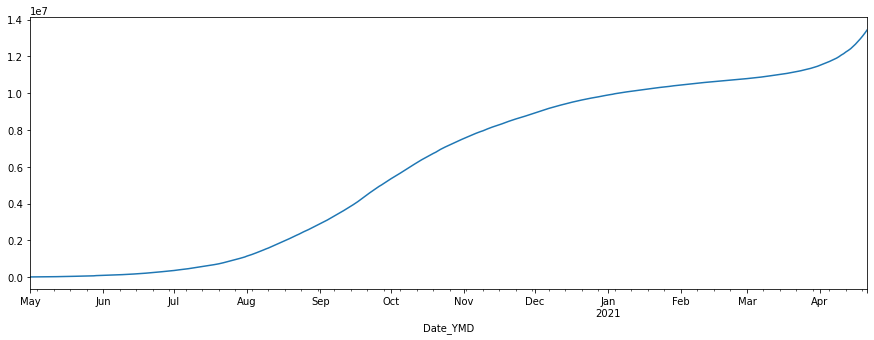

In [14]:
daily_recovered_df.plot(kind="line",figsize=(15,5))
plt.show()

In [15]:
daily_recovered_df.shape 

(356,)

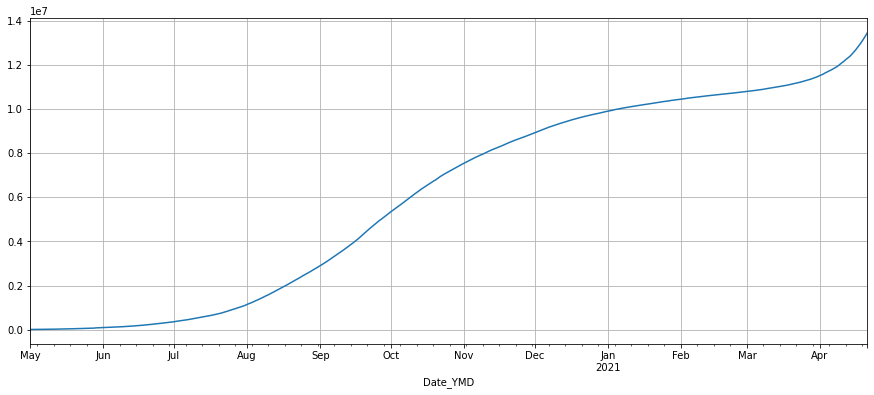

In [16]:
daily_recovered_df.plot(grid=True) #Overall slight upward trend

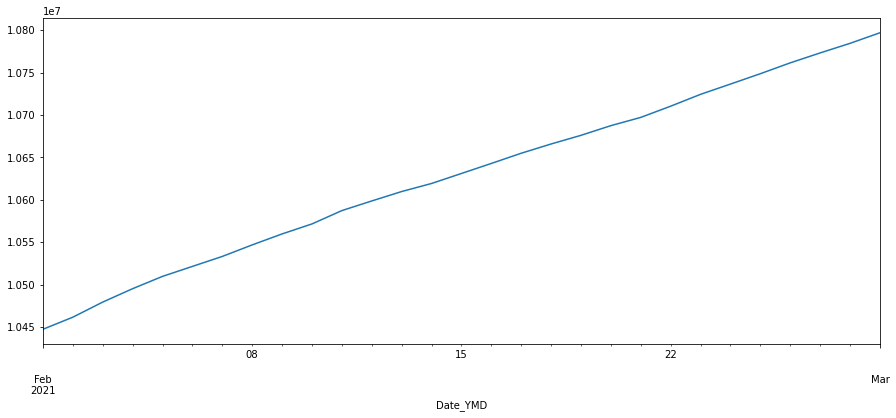

In [17]:
#analysing 2 months data
from datetime import datetime
start=datetime(2021,2,1)
end=datetime(2021,3,1)
daily_recovered_df[(start<=daily_recovered_df.index) & (daily_recovered_df.index<=end)].plot()

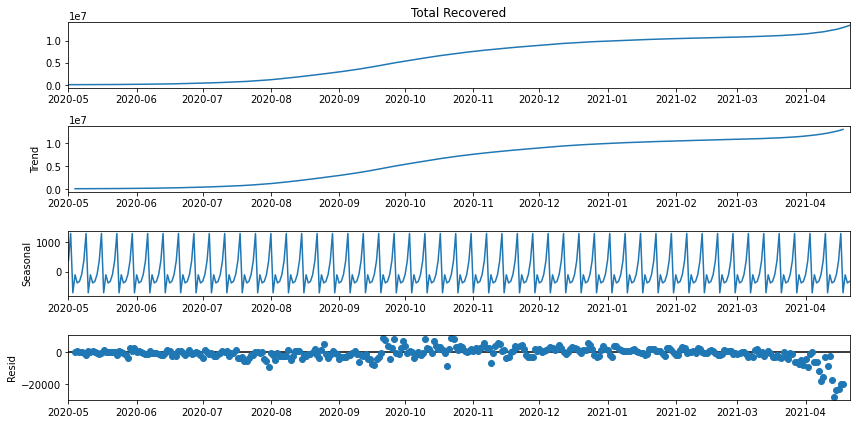

In [18]:
import statsmodels.api as sm
decomposition=sm.tsa.seasonal_decompose(daily_recovered_df,model='additive')
from pylab import rcParams
rcParams['figure.figsize'] = 12,6
fig=decomposition.plot()

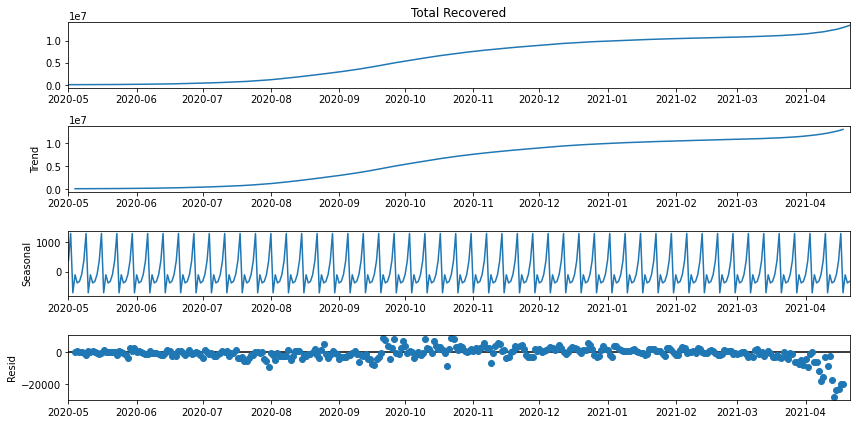

In [19]:
import statsmodels.api as sm
decomposition=sm.tsa.seasonal_decompose(daily_recovered_df,model='Multiplicative')
fig=decomposition.plot()

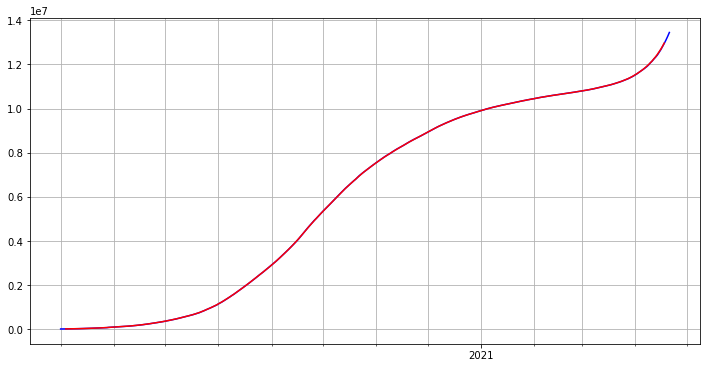

In [20]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.grid(True)
year = mdates.YearLocator()
month = mdates.MonthLocator()
year_format = mdates.DateFormatter('%Y')
month_format = mdates.DateFormatter('%m')
ax.xaxis.set_minor_locator(month)
ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)
plt.plot(daily_recovered_df.index, daily_recovered_df, c='blue')
plt.plot(decomposition.trend.index, decomposition.trend, c='red')

In [21]:
daily_recovered_df.shape

(356,)

In [22]:
train=daily_recovered_df[20:336] 
test=daily_recovered_df[336:]

In [23]:
train.tail()

Date_YMD
2021-03-28    11353680
2021-03-29    11390669
2021-03-30    11431911
2021-03-31    11472334
2021-04-01    11522718
Name: Total Recovered, dtype: int64

In [24]:
test.tail()

Date_YMD
2021-04-17    12804981
2021-04-18    12948820
2021-04-19    13103177
2021-04-20    13269833
2021-04-21    13449260
Name: Total Recovered, dtype: int64

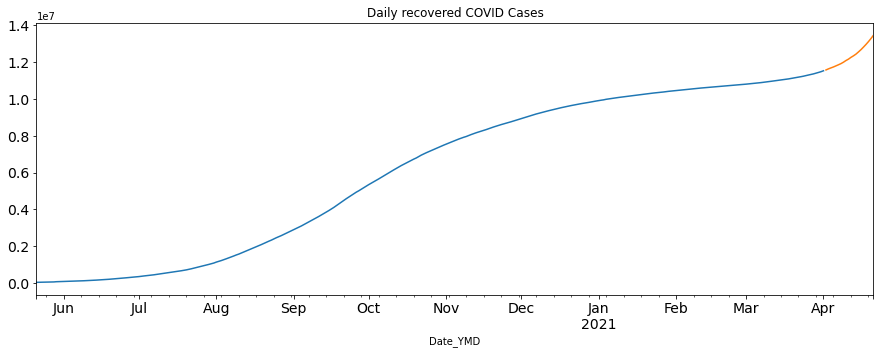

In [25]:
train.plot(figsize=(15,5), title= 'Daily recovered COVID Cases', fontsize=14)
test.plot(figsize=(15,5), title= 'Daily recovered COVID Cases', fontsize=14)
plt.show()

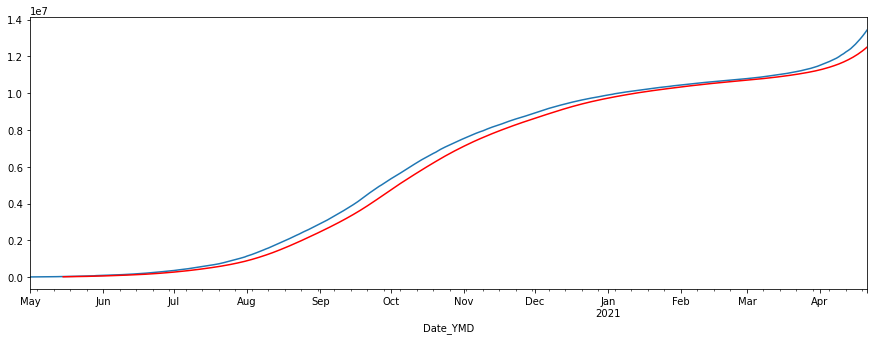

In [26]:

moving_avg =daily_recovered_df.rolling(15).mean()
daily_recovered_df.plot(kind="line",figsize=(15,5))
moving_avg.plot(kind="line",figsize=(15,5),color='red')
plt.show()

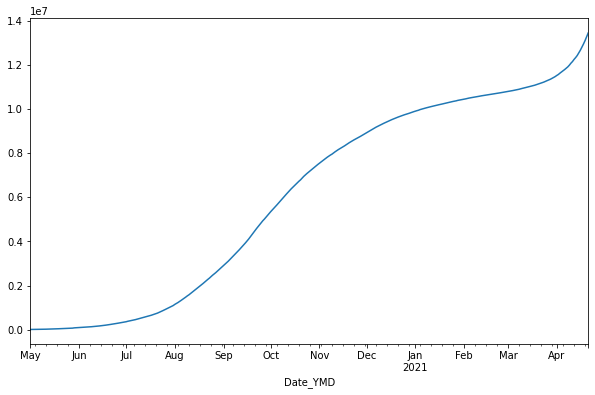

In [27]:
daily_recovered_df.plot(kind="line",figsize=(10,6))

In [28]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [29]:
#SimpleExpSmoothing is used when data doesnt follow trend and seasonality
train= train.astype('double')
ses = SimpleExpSmoothing(train).fit()
ses1 = ses.forecast(62)
ses.summary()

C:\Users\Arbaz Shaikh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


Dep. Variable:,endog,No. Observations:,316
Model:,SimpleExpSmoothing,SSE,617330080783.000
Optimized:,True,AIC,6764.165
Trend:,None,BIC,6771.677
Seasonal:,None,AICC,6764.294
Seasonal Periods:,None,Date:,"Wed, 18 Aug 2021"
Box-Cox:,False,Time:,18:37:43
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
initial_level,48553.000,l.0,True


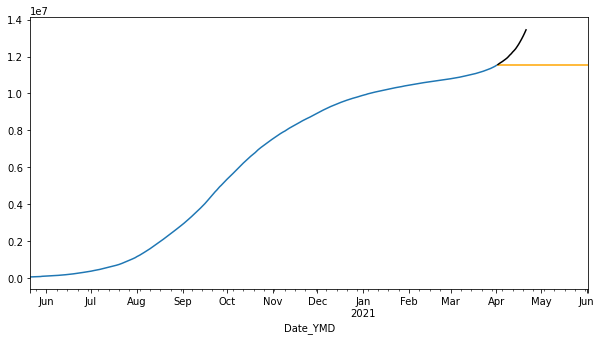

In [30]:
train.plot(kind="line",figsize=(10,5))
ses1.plot(kind="line",figsize=(10,5),color='orange')
test.plot(kind="line",figsize=(10,5),color='black')
plt.show()

In [31]:
hes = ExponentialSmoothing(train, trend='mul').fit()
hes.summary()

C:\Users\Arbaz Shaikh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


Dep. Variable:,endog,No. Observations:,316
Model:,ExponentialSmoothing,SSE,4916945567.516
Optimized:,True,AIC,5241.027
Trend:,Multiplicative,BIC,5256.050
Seasonal:,None,AICC,5241.299
Seasonal Periods:,None,Date:,"Wed, 18 Aug 2021"
Box-Cox:,False,Time:,18:37:44
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8868290,alpha,True
smoothing_slope,0.7218525,beta,True


In [32]:
hes1 = hes.forecast(62)

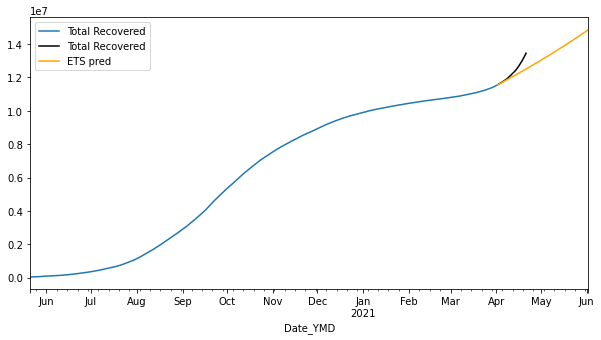

In [33]:
train.plot(kind="line",figsize=(10,5),legend=True)
test.plot(kind="line",figsize=(10,5),legend=True, color='black')
hes1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

In [34]:
hwes = ExponentialSmoothing(train, seasonal_periods=3,trend='mul', seasonal="Multiplicative").fit()


C:\Users\Arbaz Shaikh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Arbaz Shaikh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


In [35]:
hwes = hwes.forecast(50)
print(hwes)

2021-04-02    1.156615e+07
2021-04-03    1.161273e+07
2021-04-04    1.165958e+07
2021-04-05    1.170621e+07
2021-04-06    1.175336e+07
2021-04-07    1.180077e+07
2021-04-08    1.184797e+07
2021-04-09    1.189569e+07
2021-04-10    1.194368e+07
2021-04-11    1.199144e+07
2021-04-12    1.203974e+07
2021-04-13    1.208831e+07
2021-04-14    1.213665e+07
2021-04-15    1.218553e+07
2021-04-16    1.223469e+07
2021-04-17    1.228362e+07
2021-04-18    1.233309e+07
2021-04-19    1.238285e+07
2021-04-20    1.243237e+07
2021-04-21    1.248244e+07
2021-04-22    1.253280e+07
2021-04-23    1.258292e+07
2021-04-24    1.263360e+07
2021-04-25    1.268457e+07
2021-04-26    1.273530e+07
2021-04-27    1.278659e+07
2021-04-28    1.283817e+07
2021-04-29    1.288951e+07
2021-04-30    1.294143e+07
2021-05-01    1.299364e+07
2021-05-02    1.304560e+07
2021-05-03    1.309814e+07
2021-05-04    1.315098e+07
2021-05-05    1.320358e+07
2021-05-06    1.325676e+07
2021-05-07    1.331024e+07
2021-05-08    1.336347e+07
2

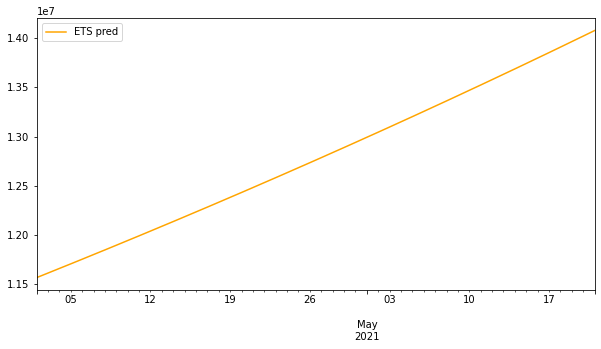

In [36]:
hwes.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

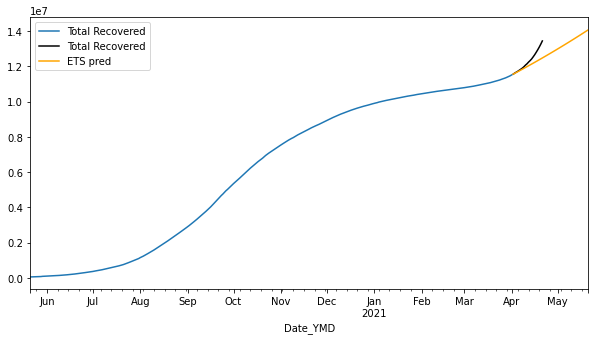

In [37]:
train.plot(kind="line",figsize=(10,5),legend=True)
test.plot(kind="line",figsize=(10,5),legend=True, color='black')
hwes.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

In [38]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  
    #Determing rolling statistics
    rolmean=pd.core.window.Rolling(timeseries, window=12).mean()
    rolstd = pd.core.window.Rolling(timeseries, window=12).std()



    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
# H0: series is nonstationary
# H1: series is stationary

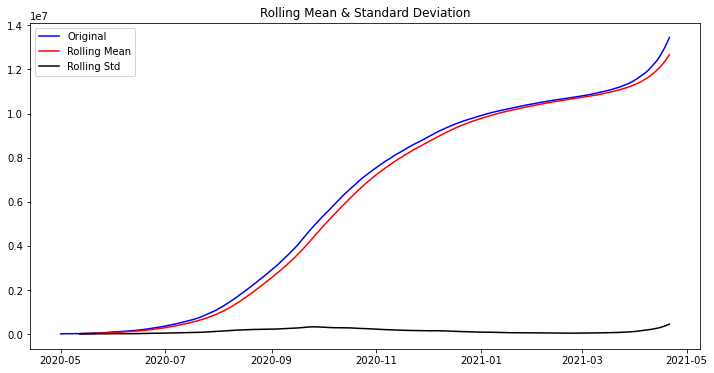

Results of Dickey-Fuller Test:
Test Statistic                   2.084640
p-value                          0.998773
#Lags Used                      13.000000
Number of Observations Used    342.000000
Critical Value (1%)             -3.449616
Critical Value (5%)             -2.870028
Critical Value (10%)            -2.571292
dtype: float64


In [39]:
test_stationarity(daily_recovered_df)

In [40]:
diff1=train.diff()
diff1=diff1.dropna()

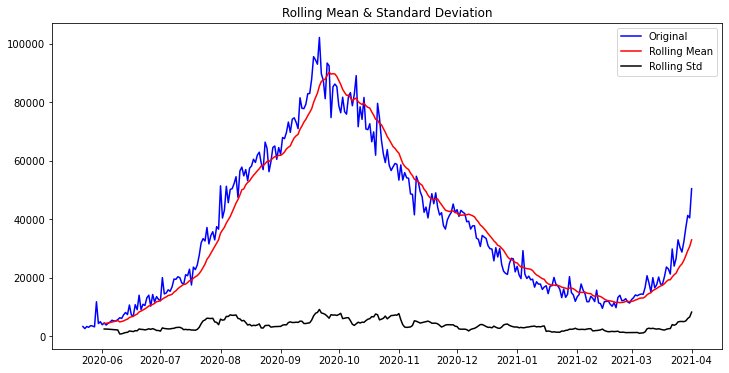

Results of Dickey-Fuller Test:
Test Statistic                  -1.938243
p-value                          0.314290
#Lags Used                      14.000000
Number of Observations Used    300.000000
Critical Value (1%)             -3.452337
Critical Value (5%)             -2.871223
Critical Value (10%)            -2.571929
dtype: float64


In [41]:
test_stationarity(diff1)

In [42]:
diff2=diff1.diff()
diff2=diff2.dropna()

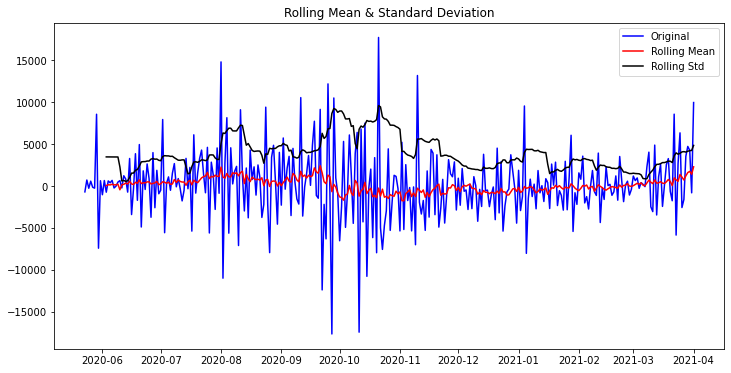

Results of Dickey-Fuller Test:
Test Statistic                  -1.990022
p-value                          0.290965
#Lags Used                      13.000000
Number of Observations Used    300.000000
Critical Value (1%)             -3.452337
Critical Value (5%)             -2.871223
Critical Value (10%)            -2.571929
dtype: float64


In [43]:
test_stationarity(diff2)

In [44]:
#Autocorelation and partial auto-corelation

In [45]:
from statsmodels.tsa.stattools import acf, pacf

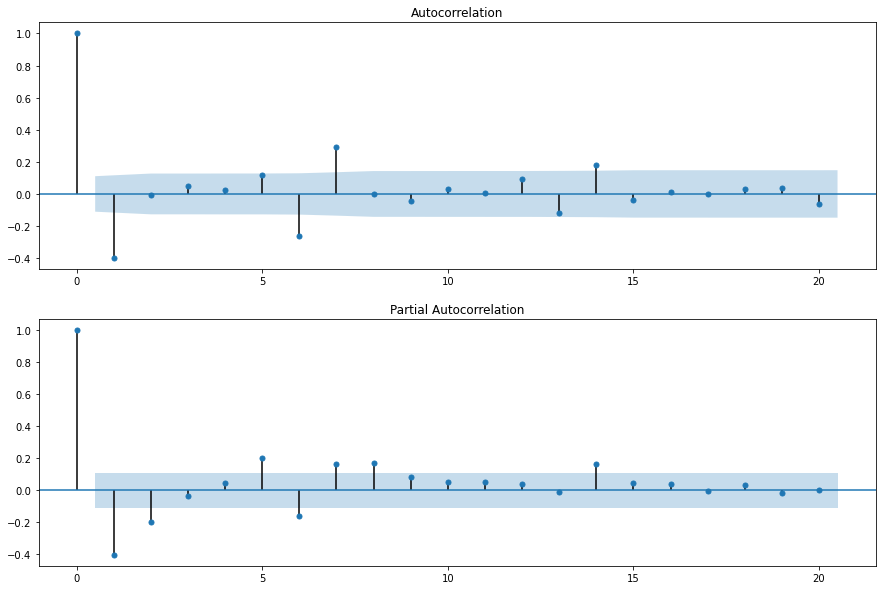

In [46]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(15,10))
pyplot.subplot(211)
plot_acf(diff2, ax=pyplot.gca(),lags=20)
pyplot.subplot(212)
plot_pacf(diff2, ax=pyplot.gca(),lags=20)
pyplot.show()

In [47]:
!pip install pmdarima

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,2,0)[6]             : AIC=6547.435, Time=0.07 sec
 ARIMA(1,2,0)(1,2,0)[6]             : AIC=6314.612, Time=0.75 sec
 ARIMA(0,2,1)(0,2,1)[6]             : AIC=inf, Time=3.98 sec
 ARIMA(1,2,0)(0,2,0)[6]             : AIC=6468.864, Time=0.17 sec
 ARIMA(1,2,0)(2,2,0)[6]             : AIC=6138.291, Time=3.92 sec
 ARIMA(1,2,0)(2,2,1)[6]             : AIC=inf, Time=4.46 sec
 ARIMA(1,2,0)(1,2,1)[6]             : AIC=inf, Time=2.73 sec
 ARIMA(0,2,0)(2,2,0)[6]             : AIC=6191.994, Time=0.61 sec
 ARIMA(2,2,0)(2,2,0)[6]             : AIC=6106.590, Time=3.67 sec
 ARIMA(2,2,0)(1,2,0)[6]             : AIC=6279.077, Time=0.66 sec
 ARIMA(2,2,0)(2,2,1)[6]             : AIC=inf, Time=6.40 sec
 ARIMA(2,2,0)(1,2,1)[6]             : AIC=inf, Time=2.83 sec
 ARIMA(3,2,0)(2,2,0)[6]             : AIC=6222.032, Time=1.27 sec
 ARIMA(2,2,1)(2,2,0)[6]             : AIC=inf, Time=4.59 sec
 ARIMA(1,2,1)(2,2,0)[6]             : AIC=6096.798, Time=8.01 s

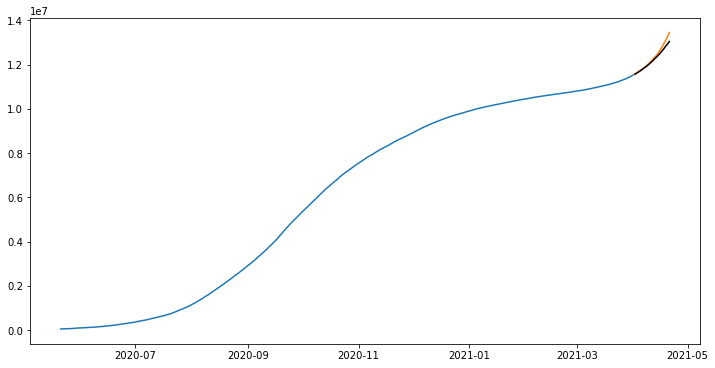

In [48]:
from pmdarima import auto_arima
model = auto_arima(train, start_p=0, start_q=0,
                           max_p=3, max_q=3, m=6,
                           start_P=0, start_Q=0, max_P=2, max_Q=2, seasonal=True,
                           d=2, D=2, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True
                          )
model.fit(train)

forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [49]:
print(model.summary()) 

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  316
Model:             SARIMAX(0, 2, 1)x(2, 2, [], 6)   Log Likelihood               -3043.608
Date:                            Wed, 18 Aug 2021   AIC                           6095.216
Time:                                    18:39:41   BIC                           6110.058
Sample:                                         0   HQIC                          6101.154
                                            - 316                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6579      0.034    -19.300      0.000      -0.725      -0.591
ar.S.L6       -1.0735      0.031   

In [50]:
from statsmodels.tsa.arima_model import ARIMA

In [51]:
model = ARIMA(train, order=(2,2,0))
model_fit=model.fit(disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:     D2.Total Recovered   No. Observations:                  314
Model:                 ARIMA(2, 2, 0)   Log Likelihood               -3033.819
Method:                       css-mle   S.D. of innovations           3798.965
Date:                Wed, 18 Aug 2021   AIC                           6075.637
Time:                        18:39:41   BIC                           6090.635
Sample:                    05-23-2020   HQIC                          6081.630
                         - 04-01-2021                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      139.0087    127.019      1.094      0.274    -109.944     387.961
ar.L1.D2.Total Recovered    -0.4876      0.056     -8.752      0.000      -0.597      -0.

C:\Users\Arbaz Shaikh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Arbaz Shaikh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


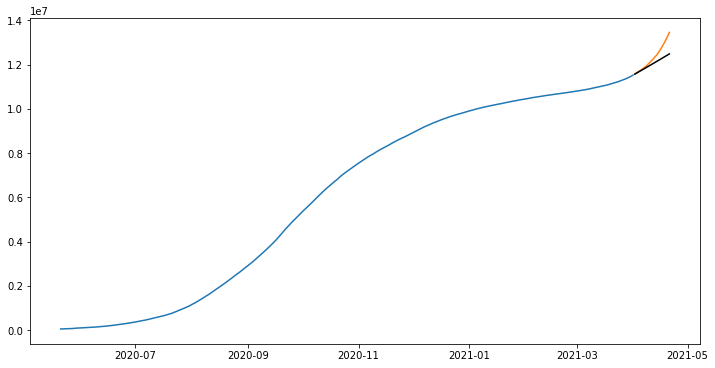

In [52]:
forecast = model_fit.forecast(steps=20)[0]

forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [54]:
print(mean_absolute_error(y_true=test,y_pred=forecast))

287906.95027516026


In [55]:
#ARIMA model gave best results.